In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
df = pd.read_csv('mydf_final.csv')
X = df.drop(columns = ['fatal'], axis = 1)
y = df.filter(['fatal'], axis = 1)
y.fatal = y.fatal.astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [2]:
# from numpy import argmax
# from sklearn.metrics import precision_recall_curve
# from sklearn. 
# from sklearn.model_selection import train_test_split

<ipython-input-3-b9229bc358b3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


0.7855791342823043


Text(69.0, 0.5, 'Truth')

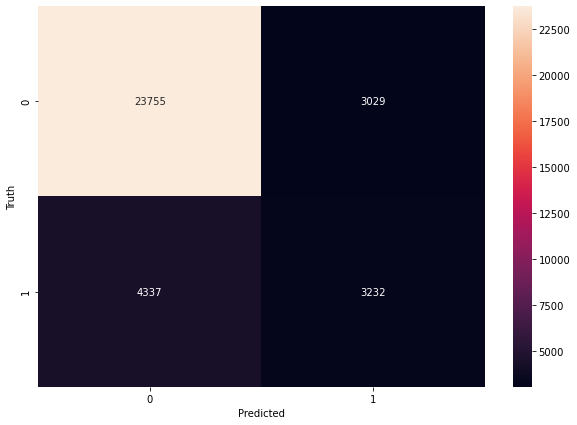

In [3]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

from sklearn.metrics import (accuracy_score, confusion_matrix)
print(accuracy_score(pred, y_test))
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [4]:
3232 / (3232+4337)

0.4270048883604175

In [5]:
23755 / (23755 + 4337)

0.8456144097963834

<ipython-input-6-a6291f400b71>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(trainX, trainy)


Best Threshold=0.197833, F-Score=0.554


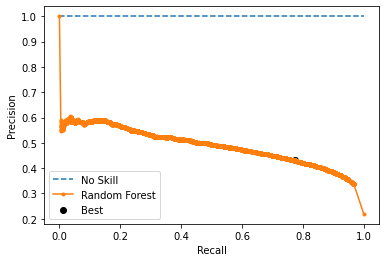

In [6]:
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.metrics import precision_recall_curve

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)
# fit a model
model = RandomForestClassifier()
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model

no_skill = len(testy[testy==1]) / len(testy)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

<ipython-input-7-8d13f093246a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


0.7936424766395948


Text(69.0, 0.5, 'Truth')

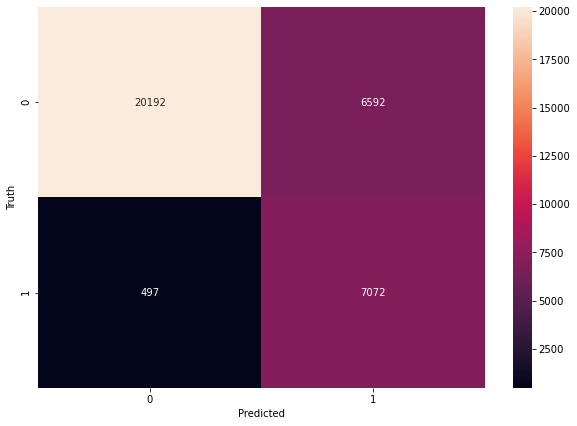

In [7]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)
predictions = np.where(model.predict_proba(X_test)[:,1] > 0.1585, 1, 0)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [8]:
7068 / (7068 + 501)

0.9338089575901705

In [9]:
20253 / (20253 + 6531)

0.756160394265233